In [1]:
import os
import glob
import cv2
import numpy as np

In [2]:
img = cv2.imread("../../images/task_1/"+'left'+"_2.png")

In [3]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
object_points=[] # world frame points
image_points=[]  # image in pixels points

In [4]:
obpoints = np.zeros((6*9,3), np.float32)
obpoints[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

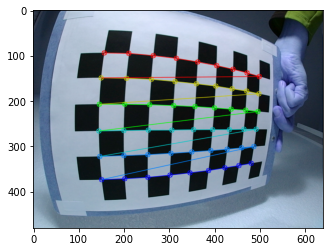

In [6]:
from IPython.display import display, Image
import matplotlib.pyplot as plt

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
if ret == True :
    mod_corners = cv2.cornerSubPix(gray,corners,(11, 11),(-1,-1),criteria)
            
    object_points.append(obpoints) 
    image_points.append(mod_corners)
     
    cv2.drawChessboardCorners(img, (9,6), corners,ret)  
    plt.imshow(img)
    
        
plt.show()

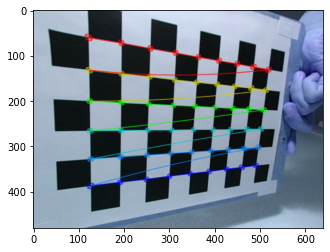

In [14]:
ret, mtx, dist, Rvecs, Tvecs = cv2.calibrateCamera(object_points, image_points, gray.shape[::-1],None,None)
h,  w = img.shape[:2]

newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    
# Undistort
dst = cv2.undistort(img, mtx, dist, None, mtx)
    
# Step (4): Check the calibration results
    
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,mtx,(w,h),5)
plt.imshow(dst)
        
plt.show()